In [3]:
%run -i grad_descent.ipynb

Epoch 1/10
1/1 [==============================] - 0s 351ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7110 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7106 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7102 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7098 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7094 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7087 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7083 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 52ms/step
Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.113418677

C:\Users\jlhb83\AppData\Local\Temp\ipykernel_3552\396317115.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))



Epoch:213, w1:3.5883183376440364, w2:1.4101923859129344, bias:-2.321563382532884, loss:0.49659684764033973
Epoch:214, w1:3.5993454909464844, w2:1.4106200758158696, bias:-2.32643288833008, loss:0.49630497643310856
Epoch:215, w1:3.610351396938527, w2:1.4110437290759732, bias:-2.331290491382403, loss:0.49601428422049737
Epoch:216, w1:3.6213360894812157, w2:1.4114634335414504, bias:-2.3361362738970306, loss:0.4957247653072439
Epoch:217, w1:3.6322996027062318, w2:1.4118792753863514, bias:-2.3409703169101865, loss:0.49543641403651506
Epoch:218, w1:3.6432419710088983, w2:1.4122913391414305, bias:-2.345792700307536, loss:0.49514922478933926
Epoch:219, w1:3.6541632290413135, w2:1.4126997077244283, bias:-2.350603502844203, loss:0.4948631919840572
Epoch:220, w1:3.6650634117056042, w2:1.4131044624697842, bias:-2.3554028021644196, loss:0.49457831007578845
Epoch:221, w1:3.6759425541473023, w2:1.4135056831577921, bias:-2.360190674820809, loss:0.4942945735559119
Epoch:222, w1:3.6868006917488327, w2:1

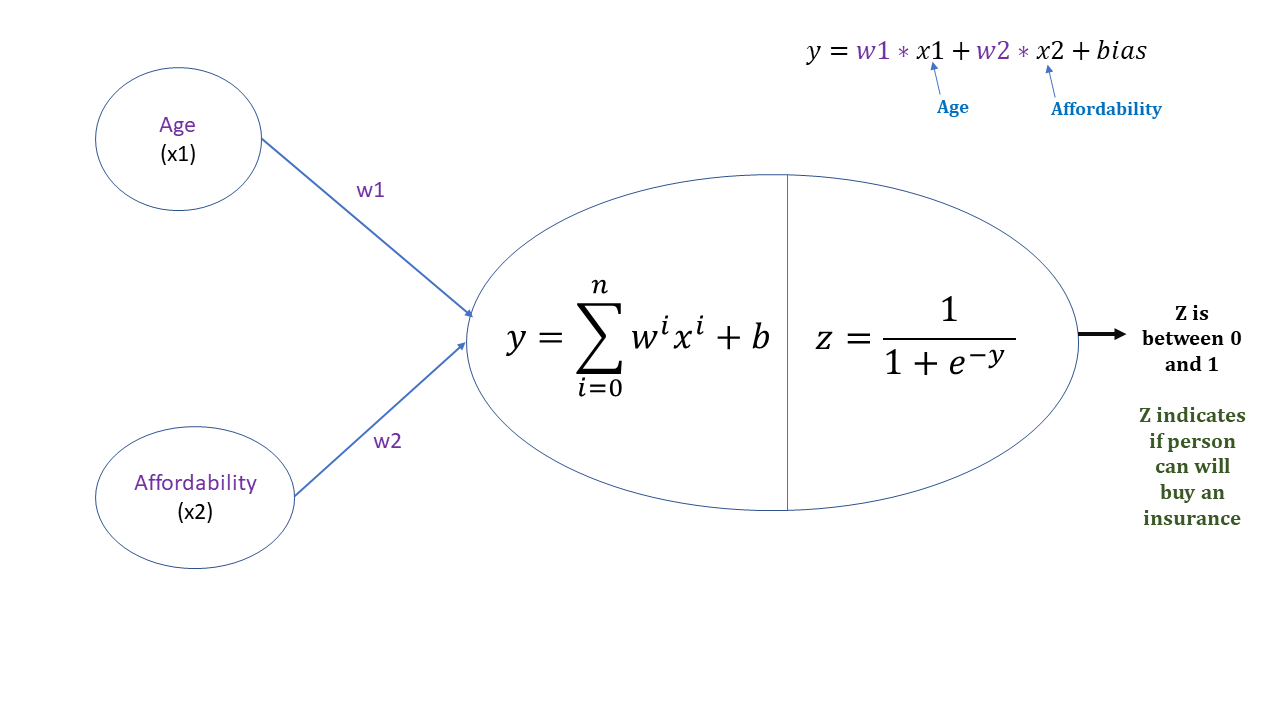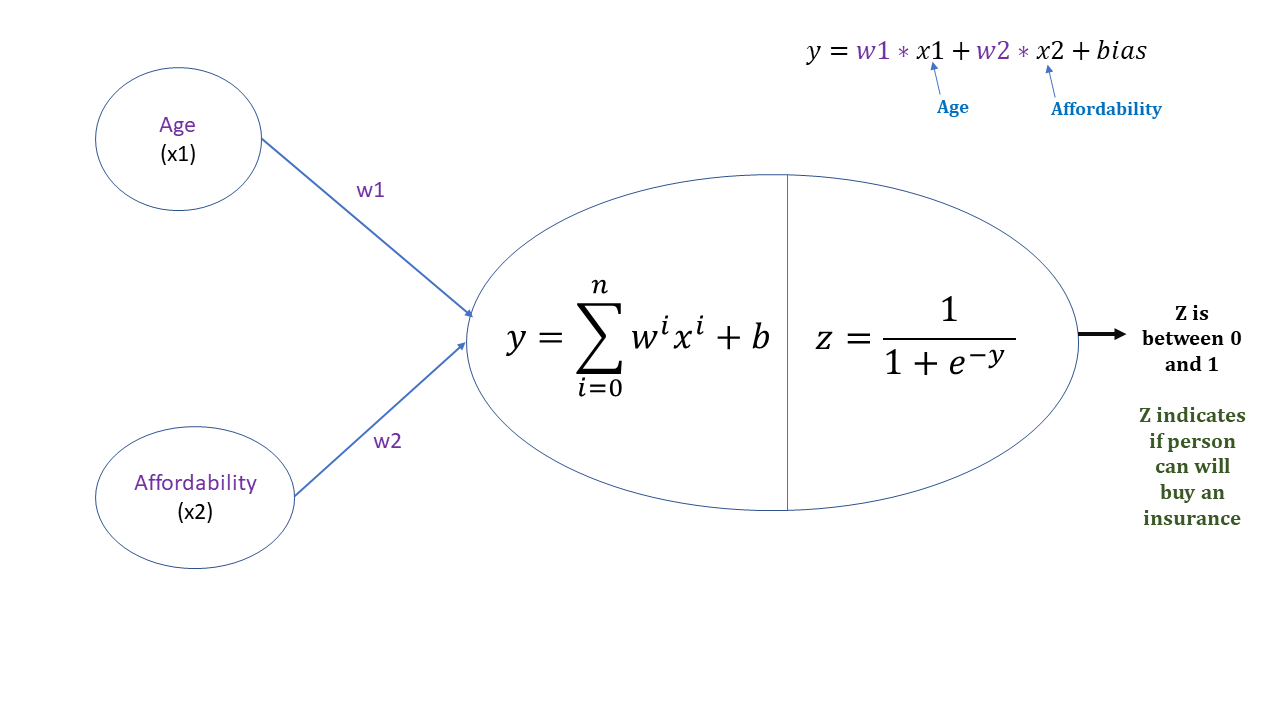

In [7]:
class myNN:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        
    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)
            
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [9]:
customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=8000, loss_thresold=0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.681264778737757
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bia

NameError: name 'w1' is not defined